<a href="https://colab.research.google.com/github/Priks06/ACI-Assignment1-PacketDeliveryAgent/blob/feature%2Fobjective-function-calculation/Bayesian_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [5]:
!pip install pomegranate

     |████████████████████████████████| 17.9MB 1.6MB/s 
     |████████████████████████████████| 15.3MB 312kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

In [ ]:
!sudo pip install pygraphviz

In [48]:
from pomegranate import *

In [49]:
import numpy as np
import pandas as pd

In [98]:
dataset=pd.read_csv("/content/data_banknote.txt", names=["variance","skewness","curtosis","entropy","class"])

In [99]:
dataset[dataset["variance"]==0]

,variance,skewness,curtosis,entropy,class


In [51]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [52]:
dataset.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [54]:
dataset.rename(columns={"variance":"variance_original","skewness":"skewness_original", "curtosis":"curtosis_original", "entropy":"entropy_original"}, inplace=True)

In [55]:
dataset.head()

,variance_original,skewness_original,curtosis_original,entropy_original,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [56]:
dataset["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [57]:
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

In [58]:
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
dataset["variance"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 0].reshape(-1, 1)))
dataset["skewness"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 1].reshape(-1, 1)))
dataset["curtosis"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 2].reshape(-1, 1)))
dataset["entropy"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 3].reshape(-1, 1)))

In [ ]:
dataset["variance"][dataset["variance"]==0]="low"
dataset["skewness"][dataset["skewness"]==0]="low"
dataset["curtosis"][dataset["curtosis"]==0]="low"
dataset["entropy"][dataset["entropy"]==0]="low"

dataset["variance"][dataset["variance"]==1]="medium"
dataset["skewness"][dataset["skewness"]==1]="medium"
dataset["curtosis"][dataset["curtosis"]==1]="medium"
dataset["entropy"][dataset["entropy"]==1]="medium"

dataset["variance"][dataset["variance"]==2]="high"
dataset["skewness"][dataset["skewness"]==2]="high"
dataset["curtosis"][dataset["curtosis"]==2]="high"
dataset["entropy"][dataset["entropy"]==2]="high"

In [60]:
dataset.head()

,variance_original,skewness_original,curtosis_original,entropy_original,class,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699,0,high,high,low,high
1,4.54590,8.1674,-2.4586,-1.46210,0,high,high,low,medium
2,3.86600,-2.6383,1.9242,0.10645,0,high,medium,low,high
3,3.45660,9.5228,-4.0112,-3.59440,0,high,high,low,medium
4,0.32924,-4.4552,4.5718,-0.98880,0,medium,medium,medium,high


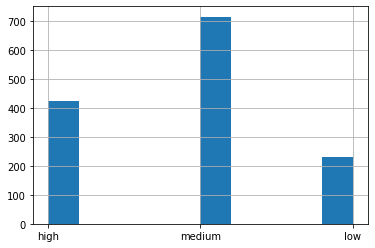

In [52]:
dataset["variance"].hist()
pyplot.show()

In [ ]:
len(dataset[(dataset["variance"]=="high")&(dataset["skewness"]=="high")&(dataset["curtosis"]=="low")])/len(dataset)

0.14868804664723032

In [80]:
dataset.head()

,variance_original,skewness_original,curtosis_original,entropy_original,class,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699,0,high,high,low,high
1,4.54590,8.1674,-2.4586,-1.46210,0,high,high,low,medium
2,3.86600,-2.6383,1.9242,0.10645,0,high,medium,low,high
3,3.45660,9.5228,-4.0112,-3.59440,0,high,high,low,medium
4,0.32924,-4.4552,4.5718,-0.98880,0,medium,medium,medium,high


In [82]:
dataset["class"]=dataset["class"].astype(str)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   variance_original  1372 non-null   float64
 1   skewness_original  1372 non-null   float64
 2   curtosis_original  1372 non-null   float64
 3   entropy_original   1372 non-null   float64
 4   class              1372 non-null   object 
 5   variance           1372 non-null   object 
 6   skewness           1372 non-null   object 
 7   curtosis           1372 non-null   object 
 8   entropy            1372 non-null   object 
dtypes: float64(4), object(5)
memory usage: 96.6+ KB


In [84]:
value=['medium', 'high', 'low']
class_value=["0", "1"]

CPT=pd.DataFrame(columns=["variance","skewness","curtosis", "entropy", "class", "prob"]) 
CPT["prob"]=0
datasetLength=len(dataset)
for variance_value in value:
  for skewness_value in value:
    for curtosis_value in value:
      for entropy_value in value:
        for cls_value in class_value:
          count=dataset[(dataset["variance"]==variance_value)&(dataset["skewness"]==skewness_value)&(dataset["curtosis"]==curtosis_value)&(dataset["entropy"]==entropy_value)
                        &(dataset["class"]==cls_value)].count().values[0]
          prob=count/datasetLength
          df=pd.DataFrame({"variance":[variance_value],"skewness":[skewness_value],"curtosis": curtosis_value, "entropy": entropy_value, "class": cls_value, "prob":prob})
          CPT=CPT.append(df,ignore_index=True)


In [85]:
dataset["variance"].value_counts()["medium"]/len(dataset)

0.5211370262390671

In [ ]:
CPT.values.tolist()

In [87]:
variance = DiscreteDistribution({'high': dataset["variance"].value_counts()["high"]/len(dataset), 'medium': dataset["variance"].value_counts()["medium"]/len(dataset), 'low': dataset["variance"].value_counts()["low"]/len(dataset)})
skewness = DiscreteDistribution({'high': dataset["skewness"].value_counts()["high"]/len(dataset), 'medium': dataset["skewness"].value_counts()["medium"]/len(dataset), 'low': dataset["skewness"].value_counts()["low"]/len(dataset)})
curtosis = DiscreteDistribution({'high': dataset["curtosis"].value_counts()["high"]/len(dataset), 'medium': dataset["curtosis"].value_counts()["medium"]/len(dataset), 'low': dataset["curtosis"].value_counts()["low"]/len(dataset)})

entropy = DiscreteDistribution({'high': dataset["entropy"].value_counts()["high"]/len(dataset), 'medium': dataset["entropy"].value_counts()["medium"]/len(dataset), 'low': dataset["entropy"].value_counts()["low"]/len(dataset)})
class_name = ConditionalProbabilityTable(CPT.values.tolist(), [variance, skewness, curtosis, entropy])


In [88]:
s1 = Node(variance, name="variance")
s2 = Node(skewness, name="skewness")
s3 = Node(curtosis, name="curtosis")
s4 = Node(entropy, name="entropy")
s5 = Node(class_name, name="class")

model = BayesianNetwork("Bank Note")
model.add_states(s1, s2, s3, s4, s5)
model.add_edge(s1, s5)
model.add_edge(s2, s5)
model.add_edge(s3, s5)
model.add_edge(s4, s5)
model.bake()

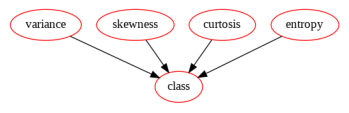

In [89]:
model.plot()

2.	Predict the probability of  data having the following values :Variance: 3.6216 , skewness: 8.6661, curtosis : -2.8073 , entropy : -0.44699, and the class is 0.

In [95]:
var=dataset["variance"][(dataset["variance_original"]>=3.6216)&(dataset["variance_original"]<=3.7)].value_counts().index[0]
skew=dataset["skewness"][(dataset["skewness_original"]>=8.6661)&(dataset["skewness_original"]<=9.0)].value_counts().index[0]
curt=dataset["curtosis"][(dataset["curtosis_original"]>=-2.8073)&(dataset["curtosis_original"]<=-2)].value_counts().index[0]
entr=dataset["entropy"][(dataset["entropy_original"]>=-0.44699)&(dataset["entropy_original"]<=0)].value_counts().index[0]
cls="0"
print(model.probability([[var, skew, curt,entr, cls]]))

0.0029851011494283217


3.	Predict the if the note is genuine or fake with the following attribute values: Variance: -1.8439, skewness: -8.6475, curtosis : 7.6796 , entropy : -0.66682.

In [96]:
var=dataset["variance"][(dataset["variance_original"]>=-1.8439)&(dataset["variance_original"]<=0)].value_counts().index[0]
skew=dataset["skewness"][(dataset["skewness_original"]>=-8.6475)&(dataset["skewness_original"]<=-8.0)].value_counts().index[0]
curt=dataset["curtosis"][(dataset["curtosis_original"]>=7.6796)&(dataset["curtosis_original"]<=8)].value_counts().index[0]
entr=dataset["entropy"][(dataset["entropy_original"]>=-0.66682)&(dataset["entropy_original"]<=0)].value_counts().index[0]

print(model.predict([[var, skew, curt,entr, None]]))

[array(['medium', 'low', 'medium', 'high', '1'], dtype=object)]


4.	Infer the probability for the data : with values 

    a.	0 for all attributes and class 0 


In [97]:
print(model.probability([[None, None, None,None, "0"]]))

1.0
